1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
from scipy import stats
import seaborn as sns
%matplotlib inline

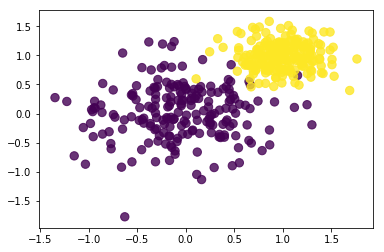

In [150]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

In [151]:
seed = 123
np.random.seed(seed)

In [152]:
mean, sigma, size = 0, 1, 500
my_array = np.random.normal(loc=mean, scale=sigma, size=size )

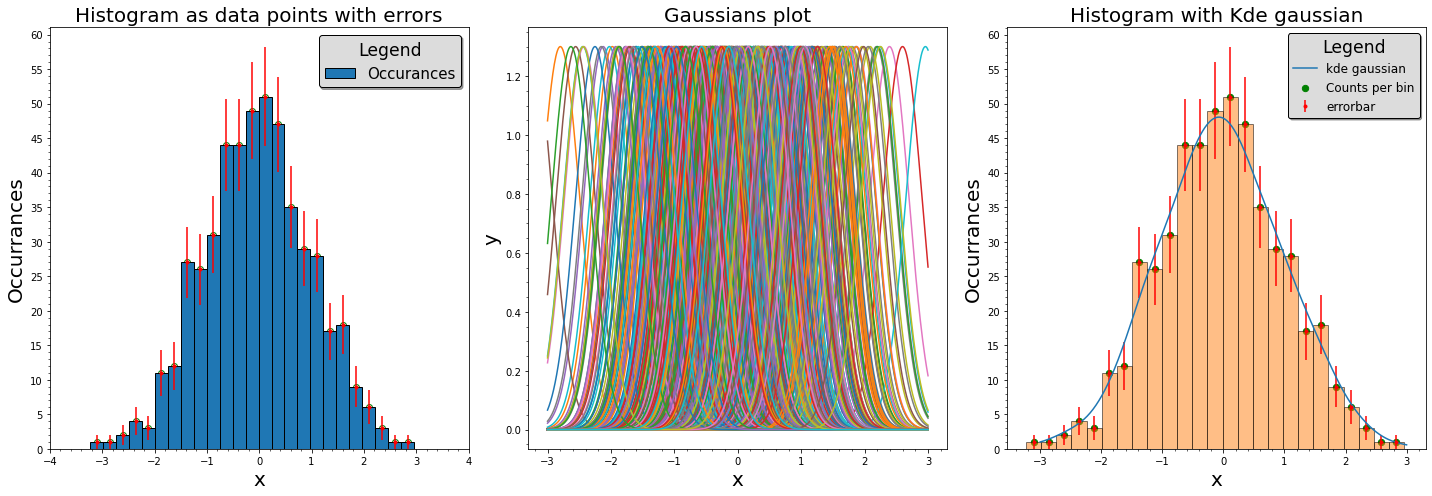

In [210]:
fig, ax = plt.subplots(nrows= 1, ncols=3, figsize=(20, 7))
bins = 25
ax[0].set_ylabel('Occurrances', fontsize=20) 
ax[0].set_xlabel('x', fontsize=20)
ax[0].set_title('Histogram as data points with errors', fontsize=20)
ax[0].scatter(bin_centers, entries, s=35, c='white', edgecolor='green')
ax[0].errorbar(bin_centers, entries, yerr=np.sqrt(entries), fmt='r.' )
entries, edges, _ = ax[0].hist(my_array, bins=bins, histtype='bar', edgecolor='black',label='Occurances')
bin_centers = 0.5 * (edges[:-1] + edges[1:])
ax[0].set_yticks(np.arange(0,np.amax(entries)+10, 5))
ax[0].set_xlim([-4, 4])
ax[0].minorticks_on()
ax[0].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', title='Legend', title_fontsize='xx-large', prop={'size': 15})


x_axis = np.linspace(mean-3*sigma, mean + 3*sigma, size)
for element in my_array:
    ax[1].plot(x_axis, stats.norm.pdf(x_axis, element, 1.06*my_array.std()*my_array.size**-0.2)) 
ax[1].minorticks_on()
ax[1].set_title('Gaussians plot', fontsize=20)
ax[1].set_ylabel('y', fontsize=20) 
ax[1].set_xlabel('x', fontsize=20)


gaussians = [stats.norm.pdf(x_axis, element, 1.06*my_array.std()*my_array.size**-0.2) for element in my_array]
gauss_sum = np.sum([stats.norm.pdf(x_axis, element, 1.06*my_array.std()*my_array.size**-0.2) for element in my_array], axis=0)
histogram_area = sc.integrate.trapezoid(entries, bin_centers)
gaussian_area = sc.integrate.trapezoid(gauss_sum, x_axis)
ax[2].plot(x_axis, (histogram_area/gaussian_area)*gauss_sum, label='kde gaussian')
ax[2].hist(my_array, bins=bins, histtype='bar', alpha=0.5, edgecolor='black')
ax[2].errorbar(bin_centers, entries, yerr=np.sqrt(entries), fmt='r.', label='errorbar')
ax[2].scatter(bin_centers, entries, s=40, c='green', label='Counts per bin')
ax[2].set_yticks(np.arange(0,np.amax(entries)+10, 5))
ax[2].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', title='Legend', title_fontsize='xx-large', prop={'size': 12})
ax[2].minorticks_on()
ax[2].set_ylabel('Occurrances', fontsize=20) 
ax[2].set_xlabel('x', fontsize=20)
ax[2].set_title('Histogram with Kde gaussian', fontsize=20)
fig.tight_layout()

In [183]:
def data_fram_gen(mean1, cov1, mean2, cov2, size):
    data1 = np.random.multivariate_normal(mean1, cov1, size=size)
    array1 = np.ones((500,3))
    array1[:,:-1] = data1
    data2 = np.random.multivariate_normal(mean2, cov2, size=size)
    array2 = np.zeros((500,3))
    array2[:,:-1] = data2
    final_array = np.append(array1, array2, axis = 0)
    return pd.DataFrame(final_array, columns=['dim1', 'dim2', 'category'])

In [184]:
mean1 = np.array([1,1])
cov1 = np.array([[1,0],[0,1]])
mean2 = np.array([4,4])
cov2 = np.array([[2,1],[1,2]])
#data2 = np.random.multivariate_normal(mean2, cov2, size=(500))
#df2 = pd.DataFrame({'column1' : data2[:,0],
#                 'column2' : data2[:,1],
#                    'category': np.zeros(500)})
#df = df.append(df2)

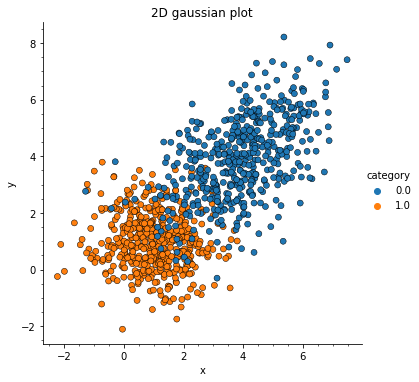

In [209]:
data_to_plot = data_fram_gen(mean1, cov1, mean2, cov2, 500)
g = sns.relplot(x='dim1', y='dim2',hue='category' , data=data_to_plot, edgecolor='black')
g.set(title='2D gaussian plot', xlabel='x', ylabel='y')
plt.minorticks_on()
fig.tight_layout()

In [104]:
#!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

In [105]:
my_array = np.load('residuals_261.npy', allow_pickle=True)

In [106]:
#my_second_array = np.random.normal(0, 1, size=500)
#print(my_second_array)
#def item(array):
#    return array.item()
    
#array2 = np.array(list(map(item, my_second_array)))



In [107]:
df = pd.DataFrame(my_array.item())
df.head(5)


,residuals,distances
0,1.10,16.0
1,-1.95,6.3
2,-7.20,3.4
3,-4.15,8.4
4,-6.59,1.7


In [108]:
#Cleaning the sample
df = df[abs(df['residuals']) < 2]
df.head()

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0


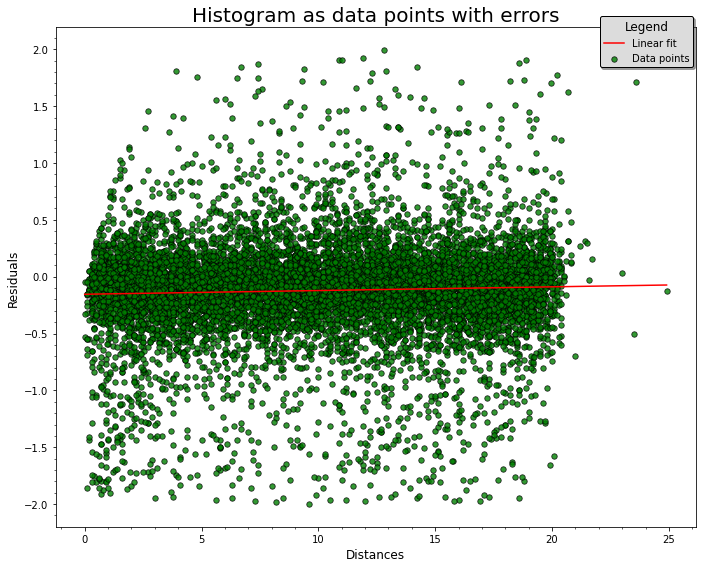

In [224]:
lin_reg = sc.stats.linregress(x=df['distances'], y = df['residuals'])
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(10, 8))
ax.scatter(x=df['distances'], y=df['residuals'], s=30, c='green', edgecolors='black', linewidths=0.8, alpha=0.8, label='Data points')
x_axis = np.linspace(np.min(df['distances']),np.max(df['distances']), 100)
y_axis = x_axis*lin_reg.slope +lin_reg.intercept
ax.plot(x_axis, y_axis, c='red', label='Linear fit')
ax.minorticks_on()
ax.set_ylabel('Residuals', fontsize=12) 
ax.set_xlabel('Distances', fontsize=12)
ax.legend(loc=(0.85,0.92), shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', title='Legend', title_fontsize='large')
ax.set_title('Histogram as data points with errors', fontsize=20)
fig.tight_layout()

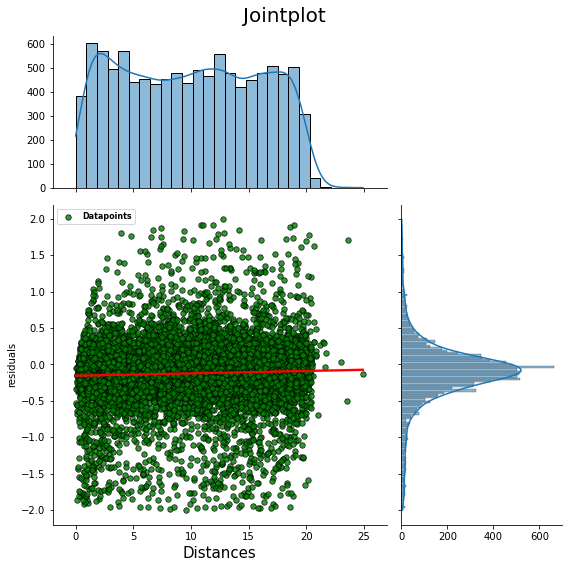

In [258]:
#fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(10, 8))
sns_plot = sns.jointplot(x="distances", y="residuals", data=df, kind="reg", ratio=2,xlim=(-2,27) ,height=8, marginal_ticks=True,joint_kws={'line_kws':{'color':'red'},'scatter_kws':{'color':'green','edgecolors':'black', 's':30,'linewidths':0.8,'alpha':0.8}}, label='Datapoints')
sns_plot.fig.suptitle('Jointplot', fontsize=20)
#sns_plot.set(title='Jointplot')
sns_plot.ax_joint.set_xlabel('Residuals', fontsize=15)
sns_plot.ax_joint.set_xlabel('Distances', fontsize=15)
legendMain=sns_plot.ax_joint.legend(prop={'weight':'bold','size':8}, loc='upper left')
sns_plot.fig.tight_layout()

In [229]:
bin_edges = np.linspace(np.min(df['distances']), np.max(df['distances']), 6)
# Bin centers
x = [(1/2*(bin_edges[i]+bin_edges[i+1])) for i in range(len(bin_edges)-1)]
print('The x array is:\n', x)
bins = [df[(df['distances']>bin_edges[i]) & (df['distances']<=bin_edges[i+1])]['residuals'] for i in range(len(bin_edges)-1)]
y = np.array([np.mean(i) for i in bins])
print('The y array is:\n', y)
erry = [np.std(i) for i in bins]
print('The y array is:\n',erry)

The x array is:
 [2.4899999999999975, 7.469999999999993, 12.449999999999989, 17.429999999999982, 22.40999999999998]
The y array is:
 [-0.16451089 -0.10359459 -0.09853218 -0.12541117  0.06620087]
The y array is:
 [0.42713739003329226, 0.4282033330399511, 0.4692688991203076, 0.4228933218583683, 0.5027682635518743]


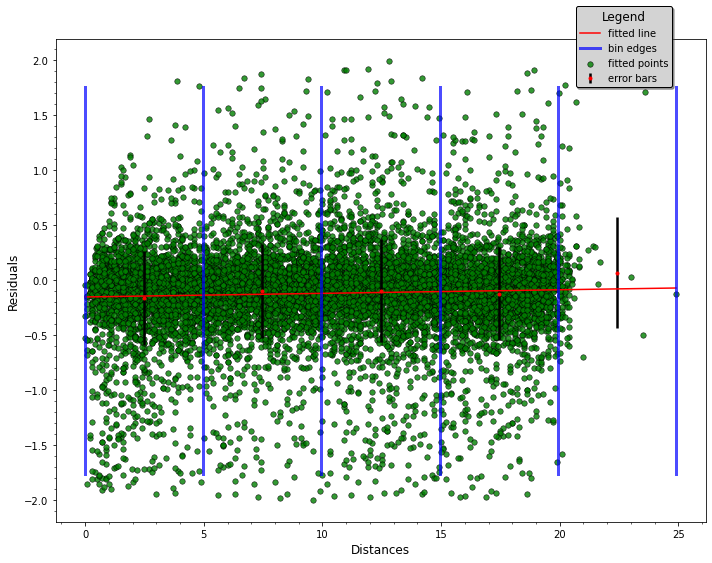

In [225]:
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(10, 8))
ax.scatter(x=df['distances'], y=df['residuals'], s=30, c='green', edgecolors='black', linewidths=0.6, alpha=0.8, label='fitted points')
ax.errorbar(x, y, yerr=erry, fmt='r.', ecolor='black', label='error bars', elinewidth=2.5)
ax.plot(x_axis, y_axis, c='red', label='fitted line')
ax.minorticks_on()
#Plotting the bins
# The for cycle only to put only one bin edge on the label
for i in bin_edges:
    if i == 0:
        ax.axvline(x=i, ymax=0.9, ymin=.1, c='blue', linewidth=3, alpha=0.7, label='bin edges')
    else:
        ax.axvline(x=i, ymax=0.9, ymin=.1, c='blue', linewidth=3, alpha=0.7)
ax.legend(loc=(0.8,0.9), shadow=True, framealpha=1, facecolor='lightgray', edgecolor='black', title='Legend', title_fontsize='large')
ax.set_ylabel('Residuals', fontsize=12) 
ax.set_xlabel('Distances', fontsize=12)
fig.tight_layout()

In [ ]:
#np.hstack((data1, np.ones(500)))
#b = np.ones((500,3))à
#b[:,:-1] = data1
#b